In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('kc_house_data_train.csv')

In [3]:
df.shape

(17290, 22)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
Unnamed: 0       17290 non-null int64
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(16), object(1)
mem

In [6]:
df['date'] = df['date'].apply(lambda x: x[:8])

In [7]:
df.date.value_counts()

20140625    111
20140623    111
20140626    106
20140708    101
20150422     99
20140709     98
20150429     97
20150427     97
20140617     96
20150414     96
20140826     96
20150428     96
20140528     94
20140520     93
20150421     93
20150408     93
20140729     92
20150325     92
20140820     92
20140603     92
20150423     90
20140722     89
20140725     89
20140811     88
20140718     88
20140624     88
20150327     88
20140701     88
20140714     87
20140825     86
20150424     86
20141028     85
20140805     85
20140716     85
20140723     84
20140619     83
20140616     83
20150407     83
20140610     83
20140618     82
20150504     82
20140923     82
20140527     82
20140812     82
20150324     81
20140721     81
20140521     81
20150224     80
20150402     80
20140604     79
20150326     79
20140804     79
20140827     78
20150330     77
20150304     77
20141027     77
20150323     77
20140813     77
20141113     77
20140924     76
20140724     76
20141021     76
20140922

In [8]:
df.head(200) 

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
5,5,1761300310,20140827,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
6,6,7732410120,20140819,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
7,7,7010701383,20141017,680000.0,3,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
8,8,291310170,20140804,384500.0,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
9,9,4232901990,20140516,605000.0,2,1.00,910,3600,1.0,0,0,4,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [9]:
df_mod = df.drop(['date', 'id', 'view', 'lat', 'long'], axis=1).reset_index(drop=True)

In [10]:
df_mod

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,0,365000.0,4,2.25,2070,8893,2.0,0,4,8,2070,0,1986,0,98058,2390,7700
1,1,865000.0,5,3.00,2900,6730,1.0,0,5,8,1830,1070,1977,0,98115,2370,6283
2,2,1038000.0,4,2.50,3770,10893,2.0,0,3,11,3770,0,1997,0,98006,3710,9685
3,3,1490000.0,3,3.50,4560,14608,2.0,0,3,12,4560,0,1990,0,98034,4050,14226
4,4,711000.0,3,2.50,2550,5376,2.0,0,3,9,2550,0,2004,0,98052,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,750000.0,5,2.50,3240,9960,1.0,0,3,8,2020,1220,1958,0,98008,2730,10400
17286,17286,440000.0,2,1.75,1300,4000,2.0,0,3,7,1300,0,1948,0,98105,1350,4013
17287,17287,310000.0,3,1.00,1050,9876,1.0,0,3,7,1050,0,1953,0,98028,1760,9403
17288,17288,427500.0,3,1.50,1900,43186,1.5,0,4,7,1300,600,1971,0,98038,2080,108028


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

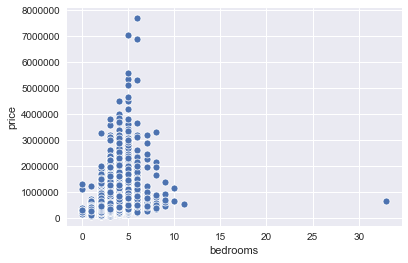

In [12]:
sns.scatterplot(df.bedrooms, df.price)

In [13]:
formula = "price ~ bedrooms+bathrooms+sqft_living"
model = ols(formula= formula, data=df).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     5967.
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:40:06   Log-Likelihood:            -2.4022e+05
No. Observations:               17290   AIC:                         4.805e+05
Df Residuals:                   17286   BIC:                         4.805e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.627e+04   7801.426      8.494      0.000     5.1e+04    8.16e+04
bedrooms    -5.711e+04   2606.363    -21.911      0.000   -6.22e+04    -5.2e+04
bathrooms    4559.3869   3982.099      1.145      0.252   -3245.931    1.24e+04
sqft_living   315.8543      3.498     90.306      0.000     308.999     322.710
==============================================================================
Omnibus:                    12031.590   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458006.040
Skew:                           2.870   Prob(JB):                         0.00
Kurtosis:                      27.552   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df.date.isnull().any()

False

In [16]:
df.zipcode.unique()

array([98058, 98115, 98006, 98034, 98052, 98031, 98007, 98199, 98027,
       98119, 98122, 98155, 98055, 98118, 98014, 98059, 98004, 98053,
       98072, 98133, 98092, 98074, 98125, 98045, 98106, 98022, 98177,
       98008, 98002, 98040, 98029, 98042, 98001, 98065, 98056, 98144,
       98188, 98109, 98010, 98075, 98198, 98030, 98105, 98023, 98028,
       98112, 98038, 98116, 98103, 98178, 98168, 98005, 98077, 98146,
       98011, 98126, 98108, 98136, 98033, 98003, 98117, 98107, 98019,
       98102, 98032, 98148, 98166, 98070, 98024, 98039])

In [17]:
locs = list(zip(df_zip.lat, df_zip.long))
locs

NameError: name 'df_zip' is not defined

In [ ]:
import folium

In [18]:
df.lat[0]
df.long[0]

-122.162

In [19]:
m = folium.Map(
    location=[47.4388, -122.162],
    zoom_start=12,
    tiles='Stamen Terrain'
)

# folium.Marker(
#     location=[47.4388, -122.162],
    icon=folium.Icon(color='green')
# ).add_to(m)

for i in locs[:50]:
    folium.Marker(
    location=[i[0],i[1]]
    ).add_to(m)

IndentationError: unexpected indent (<ipython-input-19-de1baf7a99d3>, line 9)

In [20]:
m

NameError: name 'm' is not defined

/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 3600x1440 with 0 Axes>

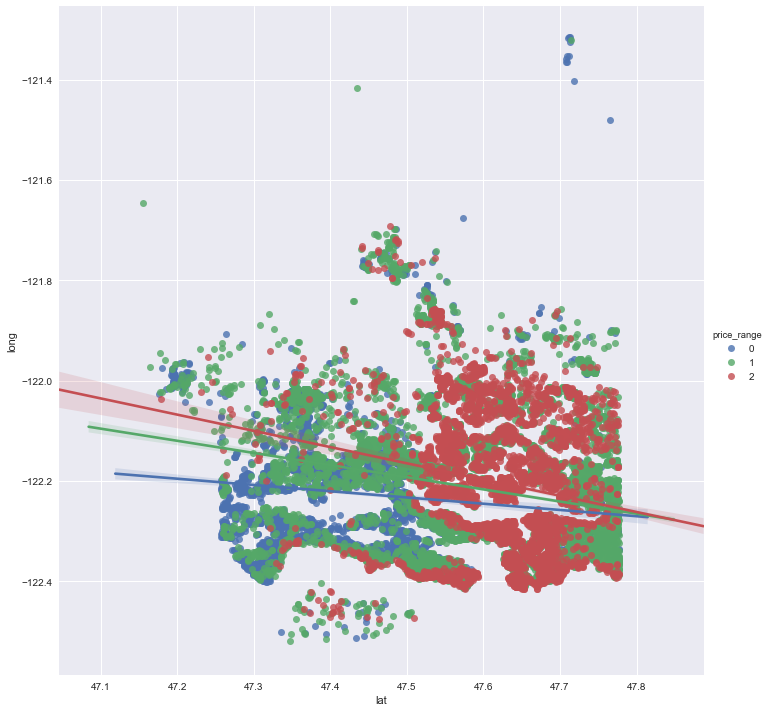

In [57]:
plt.figure(figsize = (50,20))
sns.lmplot(x = 'lat', y='long', data=df, hue = 'price_range', size=10)
plt.show()

In [ ]:
47.5 - 47.7
-122.4 - -122.0

In [71]:
df['geolat'] = df['lat'].apply(lambda x: 1 if (x >47.5) & (x < 47.7) else 0)
df['geolong'] = df['long'].apply(lambda x: 1 if (x >-122.4) & (x < -122.0) else 0)                

In [72]:
df['geoprice'] = df.geolat + df.geolong

In [75]:
df.geoprice = np.where(df.geoprice == 2, 1, 0)

In [76]:
df.geoprice.value_counts()

0    9087
1    8203
Name: geoprice, dtype: int64

In [82]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range,geolat,getlong,geoprice,geolong
0,0,2591820310,20141006,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,1,0,1,0,1
1,1,7974200820,20140821,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2,1,1,1,1
2,2,7701450110,20140815,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2,1,1,1,1
3,3,9522300010,20150331,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2,1,1,1,1
4,4,9510861140,20140714,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2,1,1,1,1


In [83]:
model = ols('price~sqft_living+geoprice', data=df).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:23:12   Log-Likelihood:            -2.3870e+05
No. Observations:               17290   AIC:                         4.774e+05
Df Residuals:                   17287   BIC:                         4.774e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.485e+05   4759.366    -31.207      0.000   -1.58e+05   -1.39e+05
sqft_living   279.1514      1.984    140.703      0.000     275.263     283.040
geoprice     2.281e+05   3655.252     62.404      0.000    2.21e+05    2.35e+05
==============================================================================
Omnibus:                    14313.943   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           936060.147
Skew:                           3.562   Prob(JB):                         0.00
Kurtosis:                      38.335   Cond. No.                     6.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
np.corrcoef(df.price, df.geoprice)

array([[1.        , 0.34026716],
       [0.34026716, 1.        ]])

In [45]:
df.price.describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [46]:
df['price_range'] = df['price'].apply(lambda x: 0 if x < 321000 else (1 if x < 645000 else 2))

In [47]:
df.price_range

0        1
1        2
2        2
3        2
4        2
        ..
17285    2
17286    1
17287    0
17288    1
17289    1
Name: price_range, Length: 17290, dtype: int64

In [93]:
corr = df2.corr()

In [92]:
df2 = df[['price', 'geoprice', 'sqft_living', 'bedrooms']]

In [ ]:
df2.apply()

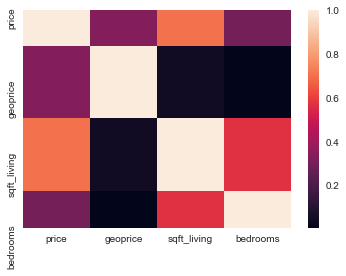

In [94]:
sns.heatmap(corr)